In [4]:
"""
A. For each tissue, enrichment [how likely are eSTR motif to fall in TF sites]
Fisher test at each tissue
    Background: All STRs motifs
    Forground: eSTRs motifs that fall within TFs 

"""

# Libraries
from collections import defaultdict
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as ss
import seaborn.apionly as sns

#functions

#variables
#    "Thyroid": "green",
SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral(Omentum)":"Adipose.V",
    "Brain-Caudate(basalganglia)":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Ventricule",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed(Suprapubic)": "SkinUnexposed",
    "Skin-SunExposed(Lowerleg)":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
TISSUES = sorted([item for item in list(SHORTEN.keys()) if item != "permuted"])
regr='/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/LR_SummaryTest_Table.tsv'
motif='/storage/resources/dbase/human/hg19/hg19.hipstr_reference_withmotif.bed'
strand= '/storage/resources/dbase/human/hg19/hg19.hipstr_reference_withmotif_stranded.bed'
TFs = '/storage/mgymrek/gtex/tfbs/encodedata/'


In [8]:
#open files
#regression summary
G = pd.read_csv(regr, sep='\t')  ; X = G[["gene","chrom","str.start","E.tissues"]]
print(G.shape)

#Add motif
S = pd.read_csv(strand, sep='\t', header=None)
S.columns =['chrom','str.start','end','motiflength', 'For_motif','Rev_motif']
GG = pd.merge(G, S[['chrom','str.start','For_motif','Rev_motif']], on=['chrom','str.start'], how='inner')
print(GG.shape)

#Can restrict to estrs only
EE =GG.loc[GG['E.tissues']>0]      #X = 2436    G=1652      GG=1652
print(EE.shape)

#Select TFs eSTRs only
TFs = '/storage/mgymrek/gtex/tfbs/encodedata/'
transfacts = os.listdir(TFs)
data = {}
n=0
for item in transfacts:
    Ovl=[]
    try:
        TF = pd.read_csv(TFs+item, sep='\t', header=None)
        TF.columns = ['chrom','start','stop','strand','numb1','num2','numb3', 'numb4','num5','numb6']
    except:
        print(TFs+item, ' has no data')
        continue
        
    Reg = EE[['chrom','str.start','str.end','gene','str.id']]; Reg.to_csv('reg.bed', sep='\t',index=None, header=None)
    fact = TF[['chrom','start','stop']]; fact.to_csv('facts.bed', sep='\t',index=None, header=None)
    print(Reg.shape, fact.shape)
    cmd = "bedtools intersect -a reg.bed -b facts.bed -wb -names Gene >Intersect.bed"
    returned_value = os.system(cmd)
    print('Done')
    try:
        inner = pd.read_csv('Intersect.bed', sep='\t', header=None)
        inner.columns=['chrom','str.start','str.end','gene','str.id','chrom_x','gene.start','gene.end']
        print(inner.shape)
        TF_EE = pd.merge(inner[['chrom','str.start','str.end','gene','str.id']], EE, on =['chrom','str.start','str.id','gene','str.end'])    
    except:
        print(item)
        continue
    data[item.split('.')[0]]=TF_EE
    Ovl=data[item.split('.')[0]]
    n=n+Ovl.shape[0]
TFs = sorted(data.keys())
print(len(TFs))
#for item in TFs:
#    print(item,'\t','-'.join(list(set(list(data[item]['motif'])))))

(38365, 59)
(38365, 61)
(2436, 61)
(2436, 5) (3690, 3)
Done
(11, 8)
(2436, 5) (502, 3)
Done
CBX3_GM12878.bed.gz
(2436, 5) (32404, 3)
Done
(20, 8)
(2436, 5) (46538, 3)
Done
(83, 8)
(2436, 5) (6351, 3)
Done
(12, 8)
(2436, 5) (42938, 3)
Done
(16, 8)
(2436, 5) (43660, 3)
Done
(26, 8)
(2436, 5) (17916, 3)
Done
(3, 8)
(2436, 5) (2239, 3)
Done
FOS_GM12878.bed.gz
(2436, 5) (42704, 3)
Done
(29, 8)
(2436, 5) (43864, 3)
Done
(39, 8)
(2436, 5) (26252, 3)
Done
(24, 8)
(2436, 5) (7768, 3)
Done
(1, 8)
(2436, 5) (36371, 3)
Done
(72, 8)
(2436, 5) (10351, 3)
Done
(15, 8)
/storage/mgymrek/gtex/tfbs/encodedata/RFX5_A549.bed.gz  has no data
(2436, 5) (48916, 3)
Done
(13, 8)
(2436, 5) (300000, 3)
Done
(220, 8)
(2436, 5) (1026, 3)
Done
KDM5A_GM12878.bed.gz
(2436, 5) (9648, 3)
Done
(10, 8)
(2436, 5) (18248, 3)
Done
(23, 8)
(2436, 5) (300000, 3)
Done
(105, 8)
(2436, 5) (7256, 3)
Done
(2, 8)
(2436, 5) (300000, 3)
Done
(72, 8)
(2436, 5) (31548, 3)
Done
(39, 8)
(2436, 5) (20258, 3)
Done
(15, 8)
(2436, 5) (14943, 

In [9]:
D = [data[x] for x in TFs]
pdata = pd.concat(D).drop_duplicates().reset_index(drop=True)
print(pdata.shape)

(1717, 61)


In [10]:
#Fisher test
motifs = list(set(list(pdata['motif'])))
print(len(motifs))

#Counts only
Counts={}
Counts['Tissues']=TISSUES
ODDMOTIF=[]
for m in motifs:
    L=[]
    nul=0
    for T in TISSUES:
        E =pdata.loc[pdata['eSTR.'+SHORTEN[T]]>0]
        Npos = E.loc[E['beta.'+SHORTEN[T]]>0]
        Nneg = E.loc[E['beta.'+SHORTEN[T]]<0]
        no = list(Npos['motif']).count(m)
        nn = list(Nneg['motif']).count(m)
        #Function to get effect size  ie effect of sample on motif (corr motif enrichment at eSTR vs any STR)
        pval = ss.binom_test(no, n=no+nn, p=0.5)   #[success is beta>0]
        if nn+no==0:
            Pv = 0
            nul = nul+1
        elif no/(no+nn) >0.5:
            Pv = +np.log10(pval)
        else:
            Pv = -np.log(pval)

        L.append(Pv)
    if nul==len(TISSUES):
        ODDMOTIF.append(m+'*')
    elif nul!=len(TISSUES) and sum(L)==0:
        ODDMOTIF.append(m+'-')
    else:
        Counts[m]=L

print(len(ODDMOTIF),' motifs without counts\n', ODDMOTIF)
df = pd.DataFrame.from_dict(Counts)
df = df.sort_values('Tissues')
df.index = list(df['Tissues']) 
del df['Tissues']
df.loc['Total']= df.sum()
sorted_df = df.sort_values(df.last_valid_index(), axis=1)
#sorted_df


65
24  motifs without counts
 ['AACAG-', 'CG-', 'ATATC-', 'AAACT-', 'AGCTCC-', 'AGGCC-', 'ACGCC-', 'CCCG-', 'AACAC-', 'ACGG-', 'AGCGG-', 'AAATT-', 'ACTCC-', 'AGAG-', 'AACAT-', 'ACCTGC-', 'CCCGCG-', 'AGCC-', 'AGATAT-', 'ACT-', 'AGATGC-', 'ACTAT-', 'AGGGGC-', 'AATT-']


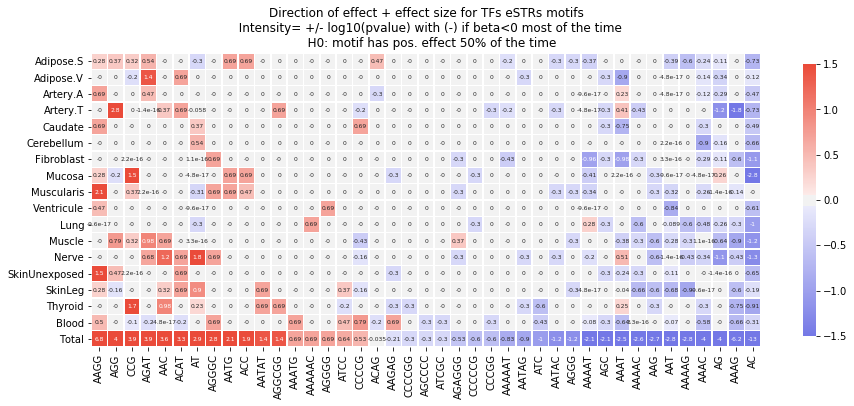

In [11]:
'''
metric="log binomial pval"
'''
#plot Enrichrment 
fig, ax = plt.subplots(figsize=(15, 25))
cmap = sns.diverging_palette(265, 15, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(sorted_df, cmap=cmap, annot_kws={"size":6},annot=True,
            vmin=-1.5, vmax=1.5, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.2}
           ,yticklabels=[SHORTEN[t] for t in TISSUES]+['Total'], 
           xticklabels=list(sorted_df.columns)
           );
ax.invert_xaxis();
plt.title('Direction of effect + effect size for TFs eSTRs motifs\n  Intensity= +/- log10(pvalue) with (-) if beta<0 most of the time\n   H0: motif has pos. effect 50% of the time')
plt.show()



In [12]:
print(len(TFs))
for item in sorted_df.columns:
    tfs =[]
    for itm in TFs:
        if item in list(set(list(data[itm]['motif']))):
            tfs.append(itm)
    print(item, '\t enrichment in \t', len(tfs), '\t transcription factors')

164
AC 	 enrichment in 	 146 	 transcription factors
AAAG 	 enrichment in 	 29 	 transcription factors
AG 	 enrichment in 	 76 	 transcription factors
AAAC 	 enrichment in 	 59 	 transcription factors
AAAAG 	 enrichment in 	 28 	 transcription factors
AAT 	 enrichment in 	 60 	 transcription factors
AAG 	 enrichment in 	 33 	 transcription factors
AAAAC 	 enrichment in 	 48 	 transcription factors
AAAT 	 enrichment in 	 74 	 transcription factors
AGC 	 enrichment in 	 24 	 transcription factors
AAAAT 	 enrichment in 	 44 	 transcription factors
AGGG 	 enrichment in 	 33 	 transcription factors
AATAC 	 enrichment in 	 12 	 transcription factors
ATC 	 enrichment in 	 32 	 transcription factors
AATAG 	 enrichment in 	 15 	 transcription factors
AAAAAT 	 enrichment in 	 13 	 transcription factors
CCCGG 	 enrichment in 	 8 	 transcription factors
CCCCCG 	 enrichment in 	 20 	 transcription factors
AGAGGG 	 enrichment in 	 11 	 transcription factors
ATCGC 	 enrichment in 	 2 	 transcription 